In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import pandas as pd
from PIL import Image
from glob import glob

# Collect all txt files
files = glob('C:/Users/julio/Downloads/Hydrodynamics/KDK/*.txt')

# Get the maximum number of lines among all text files
max_lines = max([sum(1 for line in open(f)) for f in files])

# Read each file into a list of lines
file_contents = []
for filename in files:
    with open(filename) as f:
        lines = [line.rstrip('\n') for line in f.readlines()]
        # Append empty strings for shorter files
        lines += [''] * (max_lines - len(lines))
        file_contents.append(lines)

# Write the combined contents to the output file
with open('C:/Users/julio/Downloads/Hydrodynamics/KDK/Data/Morales_KDK.txt', 'w') as outfile:
    for row in zip(*file_contents):
        outfile.write('\t'.join(row) + '\n')

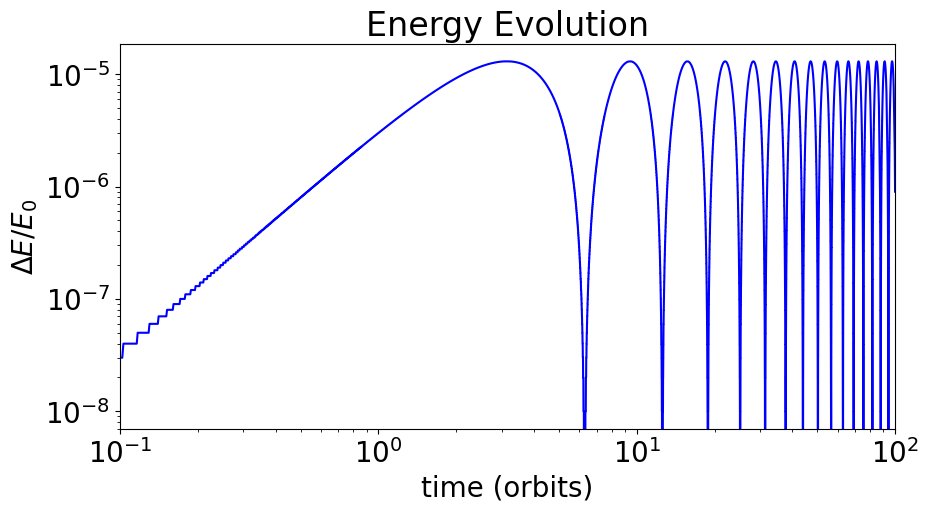

In [2]:
# Importing the dataset
filename = 'C:/Users/julio/Downloads/Hydrodynamics/KDK/Data/Morales_KDK.txt'

# Load the data from text file into dataframe using pandas
dataset = pd.read_csv(filename, delim_whitespace=True)

# Extract the data
dt = 1e-3
t  = dataset['time(n)']
xp = dataset['xplanet']
yp = dataset['yplanet']
energy_err = dataset['energy_err']

# Plot the data
plt.rc('font', size=20)
plt.figure(figsize = (10, 5))
plt.plot(t, energy_err  , 'b-', label = f'{dt:.3f}')
plt.ylabel('$\Delta E / E_0$')
plt.xlabel('time (orbits)')
plt.title("Energy Evolution")
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e-1, 1e2])
plt.savefig('C:/Users/julio/Downloads/Hydrodynamics/KDK/Plots/Energy_Evolution.jpg', dpi = 300)
plt.show()

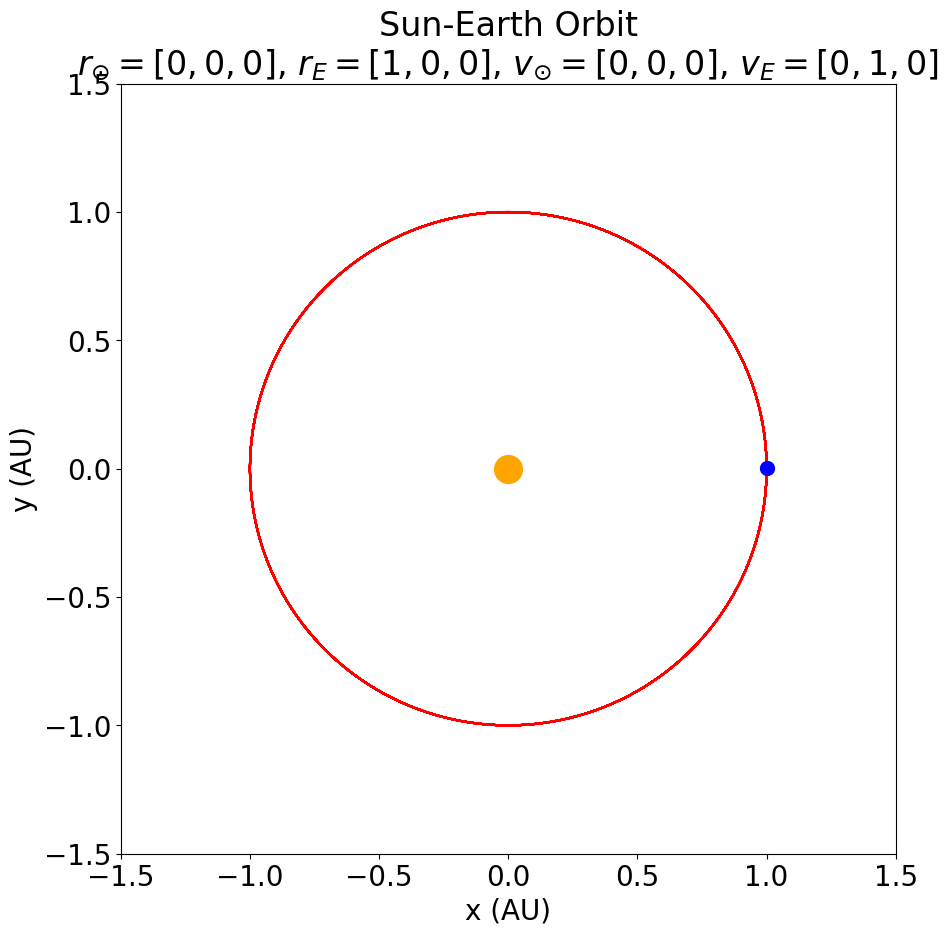

In [3]:
# Load image
img = Image.open("C:/Users/julio/Downloads/Hydrodynamics/space.jpg")

# Convert image to array and set figure size to match image
im_array = np.asarray(img)

# Make plot
plt.figure(figsize = (10, 10))
# plt.imshow(im_array, extent=[min(xp), max(xp), min(yp), max(yp)])
plt.plot(xp, yp, 'r-')
plt.plot(0, 0, 'o', color='orange', markersize=20)
plt.plot(xp[0], yp[0], 'o', color='blue', markersize=10)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Sun-Earth Orbit' + '\n' + r'$r_{\odot} = [0, 0, 0]$, $r_{E} = [1, 0, 0]$, $v_{\odot} = [0, 0, 0]$, $v_{E} = [0, 1, 0]$')
plt.savefig('C:/Users/julio/Downloads/Hydrodynamics/KDK/Plots/Orbit.jpg', dpi = 300)
plt.show()